In [1]:
import numpy as np

def rnad_replicator_step(x, y, M, pi_reg_row, pi_reg_col, eta=0.2, dt=0.02, eps=1e-12):
    # Normalize inputs
    x = np.clip(x, eps, None); x /= x.sum()
    y = np.clip(y, eps, None); y /= y.sum()
    pi_reg_row = np.clip(pi_reg_row, eps, None); pi_reg_row /= pi_reg_row.sum()
    pi_reg_col = np.clip(pi_reg_col, eps, None); pi_reg_col /= pi_reg_col.sum()

    # Payoffs (row maximizes, column minimizes)
    q_row = M @ y                  # shape (n,)
    q_col = - M.T @ x              # shape (m,)

    # Regularized fitness
    f_row = q_row - eta*(np.log(x + eps) - np.log(pi_reg_row + eps))
    f_col = q_col - eta*(np.log(y + eps) - np.log(pi_reg_col + eps))

    # Replicator RHS
    u_row = f_row - x @ f_row
    u_col = f_col - y @ f_col

    # Multiplicative Euler step
    x = x * np.exp(dt * u_row); x /= x.sum()
    y = y * np.exp(dt * u_col); y /= y.sum()
    return x, y


[0.999 0.001] [0.999 0.001]
[0.89690413 0.10309587] [0.26282676 0.73717324]
[0.47160947 0.52839053] [0.38615139 0.61384861]
[0.47662295 0.52337705] [0.50100539 0.49899461]
[0.49929354 0.50070646] [0.50453754 0.49546246]
[0.50084546 0.49915454] [0.50031038 0.49968962]
[0.50009221 0.49990779] [0.49984935 0.50015065]
[0.49997458 0.50002542] [0.49997647 0.50002353]
[0.4999945 0.5000055] [0.50000398 0.49999602]


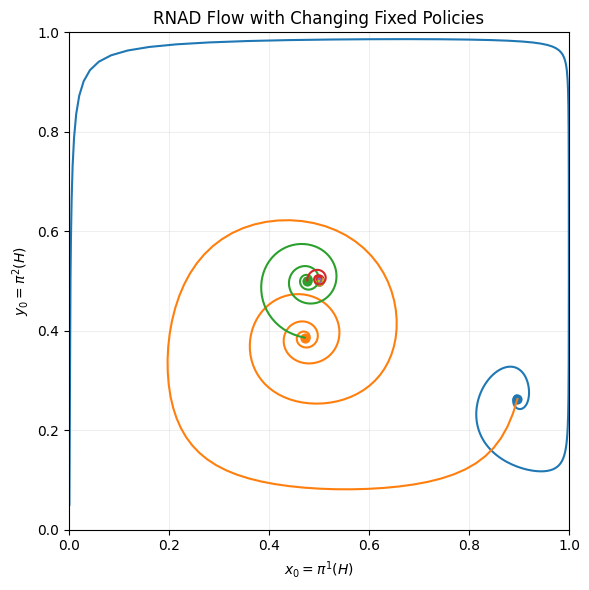

[0.50000055 0.49999945] [0.50000121 0.49999879] 9


In [2]:
import matplotlib.pyplot as plt

eta = 0.2
M = np.array([[1, -1],
              [-1, 1]], dtype=float)

x = np.array([0.001, 0.999])
y = np.array([0.05, 0.95])
pi_reg_row = np.array([0.999, 0.001])
pi_reg_col = np.array([0.999, 0.001])

# Use ten visually distinct colors from tab10, which is very colorblind-friendly and high-contrast
color_cycle = plt.cm.tab10.colors

plt.figure(figsize=(6, 6))
plt.xlabel(r"$x_0 = \pi^{1}(H)$")
plt.ylabel(r"$y_0 = \pi^{2}(H)$")
plt.title("RNAD Flow with Changing Fixed Policies")
plt.xlim(0, 1)
plt.ylim(0, 1)

# Convergence threshold and initial difference bigger than threshold
threshold = 1e-5
diff = np.inf
k = 0
max_iters = 1000 * 10  # safety cap
while diff > threshold and k < max_iters:
    x_trace, y_trace = [x[0]], [y[0]]
    for _ in range(1000):
        x, y = rnad_replicator_step(x, y, M, pi_reg_row, pi_reg_col, eta=eta, dt=0.1)
        x_trace.append(x[0])
        y_trace.append(y[0])
    color = color_cycle[k % len(color_cycle)]
    plt.plot(x_trace, y_trace, color=color, lw=1.5)
    plt.scatter(x_trace[-1], y_trace[-1], color=color, s=40)
    prev_pi_reg_row = pi_reg_row.copy()
    prev_pi_reg_col = pi_reg_col.copy()
    print(prev_pi_reg_row, prev_pi_reg_col)
    pi_reg_row = x.copy()
    pi_reg_col = y.copy()
    diff = max(np.linalg.norm(pi_reg_row - prev_pi_reg_row), np.linalg.norm(pi_reg_col - prev_pi_reg_col))
    k += 1

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()
print(pi_reg_row, pi_reg_col, k)

[[ 0.73168435 -0.54711434]
 [-2.08409861 -1.16684196]]
[0.999 0.001] [0.999 0.001]
[9.99999953e-01 4.70023173e-08] [0.62545369 0.37454631]
[9.99999998e-01 2.05552094e-09] [0.00278358 0.99721642]
[1.00000000e+00 9.17661346e-11] [4.66589979e-06 9.99995334e-01]


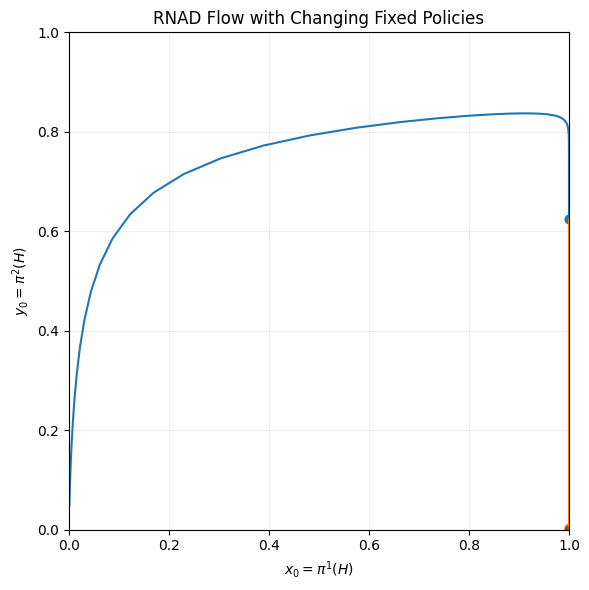

[1.00000000e+00 3.18473712e-12] [7.79840476e-09 9.99999992e-01] 4


In [ ]:
import matplotlib.pyplot as plt

eta = 0.2
M = np.random.randn(2, 2)
print(M)
x = np.array([0.001, 0.999])
y = np.array([0.05, 0.95])
pi_reg_row = np.array([0.999, 0.001])
pi_reg_col = np.array([0.999, 0.001])

# Use ten visually distinct colors from tab10, which is very colorblind-friendly and high-contrast
color_cycle = plt.cm.tab10.colors

plt.figure(figsize=(6, 6))
plt.xlabel(r"$x_0 = \pi^{1}(H)$")
plt.ylabel(r"$y_0 = \pi^{2}(H)$")
plt.title("RNAD Flow with Changing Fixed Policies")
plt.xlim(0, 1)
plt.ylim(0, 1)

# Convergence threshold and initial difference bigger than threshold
threshold = 1e-5
diff = np.inf
k = 0
max_iters = 1000 * 10  # safety cap
while diff > threshold and k < max_iters:
    x_trace, y_trace = [x[0]], [y[0]]
    for _ in range(1000):
        x, y = rnad_replicator_step(x, y, M, pi_reg_row, pi_reg_col, eta=eta, dt=0.1)
        x_trace.append(x[0])
        y_trace.append(y[0])
    color = color_cycle[k % len(color_cycle)]
    plt.plot(x_trace, y_trace, color=color, lw=1.5)
    plt.scatter(x_trace[-1], y_trace[-1], color=color, s=40)
    prev_pi_reg_row = pi_reg_row.copy()
    prev_pi_reg_col = pi_reg_col.copy()
    print(f"Row policy: {prev_pi_reg_row}, Col policy: {prev_pi_reg_col}")
    
    # Compute and print policy values for each player
    row_policy_value = np.dot(prev_pi_reg_row, M @ prev_pi_reg_col)
    col_policy_value = np.dot(prev_pi_reg_col, -M.T @ prev_pi_reg_row)    # NOTE the negative!
    print(f"Row policy value: {row_policy_value:.5f}, Col policy value: {col_policy_value:.5f}")
    
    pi_reg_row = x.copy()
    pi_reg_col = y.copy()
    diff = max(np.linalg.norm(pi_reg_row - prev_pi_reg_row), np.linalg.norm(pi_reg_col - prev_pi_reg_col))
    k += 1

plt.grid(alpha=0.2)
plt.tight_layout()
plt.show()
print(pi_reg_row, pi_reg_col, k)

In [54]:
%%time

m = 34
n = 22
eta = 0.2
M = np.random.randn(m, n)

x = np.ones(m); x /= x.sum()
y = np.ones(n); y /= y.sum()
pi_reg_row = x
pi_reg_col = y

# Convergence threshold and initial difference bigger than threshold
threshold = 1e-6
diff = np.inf
k = 0
max_iters = 1000 * 10  # safety cap
while diff > threshold and k < max_iters:
    if k % 100 == 0:
        print(k)
    for _ in range(2000):
        x, y = rnad_replicator_step(x, y, M, pi_reg_row, pi_reg_col, eta=eta, dt=0.1)
    prev_pi_reg_row = pi_reg_row.copy()
    prev_pi_reg_col = pi_reg_col.copy()
    pi_reg_row = x.copy()
    pi_reg_col = y.copy()
    diff = max(np.linalg.norm(pi_reg_row - prev_pi_reg_row), np.linalg.norm(pi_reg_col - prev_pi_reg_col))
    k += 1

print("Final policies:")
print("Row:", pi_reg_row)
print("Col:", pi_reg_col)
print("Iterations:", k)

# --- Nash equilibrium/Regret checking ---
# Row player's best response against col's policy
row_payoffs = M @ pi_reg_col        # expected payoff for each pure strategy
row_policy_value = pi_reg_row @ row_payoffs
row_best_response_value = np.max(row_payoffs)
row_regret = row_best_response_value - row_policy_value

# Col player's best response against row's policy (since it's zero-sum, min payoff)
col_payoffs = -M.T @ pi_reg_row      # expected payoff for each pure strategy
col_policy_value = pi_reg_col @ col_payoffs
col_best_response_value = np.max(col_payoffs)
col_regret = col_policy_value - col_best_response_value

print("\nNash/Regret Check:")
print(f"Row player value: {row_policy_value:.6f}, best response value: {row_best_response_value:.6f}, regret: {row_regret:.6e}")
print(f"Col player value: {col_policy_value:.6f}, best response value: {col_best_response_value:.6f}, regret: {col_regret:.6e}")

# It's a Nash equilibrium if both regrets are close to zero
is_nash = np.isclose(row_regret, 0, atol=1e-5) and np.isclose(col_regret, 0, atol=1e-5)
print("Is approximate Nash equilibrium:", is_nash)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
Final policies:
Row: [9.77376594e-13 9.89583212e-13 9.82765513e-13 9.79500315e-13
 1.17265630e-01 2.97146972e-04 9.45842460e-13 9.51345930e-13
 4.25467682e-02 9.88694175e-13 9.48645738e-13 6.49855141e-02
 3.87262216e-02 7.07085927e-02 7.26899551e-02 9.97884602e-13
 1.21455522e-02 9.11412610e-02 9.67617622e-13 9.60398910e-13
 3.88070892e-02 1.44543905e-02 5.74679077e-02 1.14642222e-01
 9.82720100e-13 9.94637205e-13 7.96876609e-02 9.50837590e-13
 9.41707882e-13 1.67339808e-01 1.70942797e-02 9.84042201e-13
 9.56495813e-13 9.73614016e-13]
Col: [1.10747622e-01 9.94964553e-13 9.93231149e-02 7.49700490e-02
 6.51762197e-05 9.70580191e-02 9.81534597e-13 3.00383365e-03
 6.25143131e-02 7.80439942e-02 1.4

In [ ]:
%%time 

m = 34
n = 22
eta = 0.2
# M = np.random.randn(m, n)

x = np.ones(m); x /= x.sum()
y = np.ones(n); y /= y.sum()
pi_reg_row = x
pi_reg_col = y

# Convergence threshold and initial difference bigger than threshold
threshold = 1e-6
diff = np.inf
k = 0
max_iters = 1000 * 10  # safety cap
while diff > threshold and k < max_iters:
    if k % 100 == 0:
        print(k)
    for _ in range(1000):
        x, y = rnad_replicator_step(x, y, M, pi_reg_row, pi_reg_col, eta=eta, dt=0.1)
    prev_pi_reg_row = pi_reg_row.copy()
    prev_pi_reg_col = pi_reg_col.copy()
    pi_reg_row = x.copy()
    pi_reg_col = y.copy()
    diff = max(np.linalg.norm(pi_reg_row - prev_pi_reg_row), np.linalg.norm(pi_reg_col - prev_pi_reg_col))
    k += 1

print("Final policies:")
print("Row:", pi_reg_row)
print("Col:", pi_reg_col)
print("Iterations:", k)

# --- Nash equilibrium/Regret checking ---
# Row player's best response against col's policy
row_payoffs = M @ pi_reg_col        # expected payoff for each pure strategy
row_policy_value = pi_reg_row @ row_payoffs
row_best_response_value = np.max(row_payoffs)
row_regret = row_best_response_value - row_policy_value

# Col player's best response against row's policy (since it's zero-sum, min payoff)
col_payoffs = -M.T @ pi_reg_row      # expected payoff for each pure strategy
col_policy_value = pi_reg_col @ col_payoffs
col_best_response_value = np.max(col_payoffs)
col_regret = col_policy_value - col_best_response_value

print("\nNash/Regret Check:")
print(f"Row player value: {row_policy_value:.6f}, best response value: {row_best_response_value:.6f}, regret: {row_regret:.6e}")
print(f"Col player value: {col_policy_value:.6f}, best response value: {col_best_response_value:.6f}, regret: {col_regret:.6e}")

# It's a Nash equilibrium if both regrets are close to zero
is_nash = np.isclose(row_regret, 0, atol=1e-5) and np.isclose(col_regret, 0, atol=1e-5)
print("Is approximate Nash equilibrium:", is_nash)

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
Final policies:
Row: [9.77376594e-13 9.89583212e-13 9.82765513e-13 9.79500315e-13
 1.17265630e-01 2.97146964e-04 9.45842460e-13 9.51345930e-13
 4.25467682e-02 9.88694175e-13 9.48645738e-13 6.49855141e-02
 3.87262216e-02 7.07085927e-02 7.26899551e-02 9.97884602e-13
 1.21455522e-02 9.11412610e-02 9.67617622e-13 9.60398910e-13
 3.88070892e-02 1.44543905e-02 5.74679077e-02 1.14642222e-01
 9.82720100e-13 9.94637205e-13 7.96876609e-02 9.50837590e-13
 9.41707882e-13 1.67339808e-01 1.70942797e-02 9.84042201e-13
 9.56495813e-13 9.73614016e-13]
Col: [1.10747622e-01 9.94964553e-13 9.93231149e-02 7.49700490e-02
 6.51762295e-05 9.70580191e-02 9.81534597e-13 3.00383365e-03
 6.25143131e-02 7.80439942e-02 1.4

In [59]:
%%time 

eta = 0.2
M = np.array([
    [0, -1, 1],
    [1, 0, -1],
    [-1, 1, 0]
])
x = np.array([1., 3., 5.]); x /= x.sum()
y = np.array([2., 4., 6.]); y /= y.sum()
pi_reg_row = x
pi_reg_col = y

# Convergence threshold and initial difference bigger than threshold
threshold = 1e-6
diff = np.inf
k = 0
max_iters = 1000 * 10  # safety cap
while diff > threshold and k < max_iters:
    if k % 100 == 0:
        print(k)
    for _ in range(1000):
        x, y = rnad_replicator_step(x, y, M, pi_reg_row, pi_reg_col, eta=eta, dt=0.1)
    prev_pi_reg_row = pi_reg_row.copy()
    prev_pi_reg_col = pi_reg_col.copy()
    pi_reg_row = x.copy()
    pi_reg_col = y.copy()
    diff = max(np.linalg.norm(pi_reg_row - prev_pi_reg_row), np.linalg.norm(pi_reg_col - prev_pi_reg_col))
    k += 1

print("Final policies:")
print("Row:", pi_reg_row)
print("Col:", pi_reg_col)
print("Iterations:", k)

# --- Nash equilibrium/Regret checking ---
# Row player's best response against col's policy
row_payoffs = M @ pi_reg_col        # expected payoff for each pure strategy
row_policy_value = pi_reg_row @ row_payoffs
row_best_response_value = np.max(row_payoffs)
row_regret = row_best_response_value - row_policy_value

# Col player's best response against row's policy (since it's zero-sum, min payoff)
col_payoffs = -M.T @ pi_reg_row      # expected payoff for each pure strategy
col_policy_value = pi_reg_col @ col_payoffs
col_best_response_value = np.max(col_payoffs)
col_regret = col_policy_value - col_best_response_value

print("\nNash/Regret Check:")
print(f"Row player value: {row_policy_value:.6f}, best response value: {row_best_response_value:.6f}, regret: {row_regret:.6e}")
print(f"Col player value: {col_policy_value:.6f}, best response value: {col_best_response_value:.6f}, regret: {col_regret:.6e}")

# It's a Nash equilibrium if both regrets are close to zero
is_nash = np.isclose(row_regret, 0, atol=1e-5) and np.isclose(col_regret, 0, atol=1e-5)
print("Is approximate Nash equilibrium:", is_nash)

0
Final policies:
Row: [0.33333346 0.33333335 0.33333319]
Col: [0.3333334  0.33333338 0.33333322]
Iterations: 13

Nash/Regret Check:
Row player value: -0.000000, best response value: 0.000000, regret: 1.865671e-07
Col player value: 0.000000, best response value: 0.000000, regret: -2.691234e-07
Is approximate Nash equilibrium: True
CPU times: user 350 ms, sys: 0 ns, total: 350 ms
Wall time: 349 ms


In [5]:
import numpy as np

def rnad_replicator_step(
    x, y, M, N, 
    pi_reg_row, pi_reg_col, 
    eta=0.2, dt=0.02, eps=1e-12
):
    """
    Replicator step for general-sum games:
      - M: Row player's payoff matrix
      - N: Col player's payoff matrix
    """
    # Normalize inputs
    x = np.clip(x, eps, None); x /= x.sum()
    y = np.clip(y, eps, None); y /= y.sum()
    pi_reg_row = np.clip(pi_reg_row, eps, None); pi_reg_row /= pi_reg_row.sum()
    pi_reg_col = np.clip(pi_reg_col, eps, None); pi_reg_col /= pi_reg_col.sum()

    # Payoffs: each player gets expectation under the other's strategy
    q_row = M @ y                  # shape (n,)
    q_col = N @ x                # shape (m,)

    # Regularized fitness
    f_row = q_row - eta*(np.log(x + eps) - np.log(pi_reg_row + eps))
    f_col = q_col - eta*(np.log(y + eps) - np.log(pi_reg_col + eps))

    # Replicator RHS
    u_row = f_row - x @ f_row
    u_col = f_col - y @ f_col

    # Multiplicative Euler step
    x = x * np.exp(dt * u_row); x /= x.sum()
    y = y * np.exp(dt * u_col); y /= y.sum()
    return x, y


In [9]:
%%time 

m = 34
n = 22
eta = 0.2
M = np.random.randn(m, n)
N = np.random.randn(n, m)

x = np.ones(m); x /= x.sum()
y = np.ones(n); y /= y.sum()
pi_reg_row = x
pi_reg_col = y

# Convergence threshold and initial difference bigger than threshold
threshold = 1e-6
diff = np.inf
k = 0
max_iters = 1000 * 10  # safety cap
while diff > threshold and k < max_iters:
    if k % 100 == 0:
        print(k)
    for _ in range(1000):
        x, y = rnad_replicator_step(x, y, M, N, pi_reg_row, pi_reg_col, eta=eta, dt=0.1)
    prev_pi_reg_row = pi_reg_row.copy()
    prev_pi_reg_col = pi_reg_col.copy()
    pi_reg_row = x.copy()
    pi_reg_col = y.copy()
    diff = max(np.linalg.norm(pi_reg_row - prev_pi_reg_row), np.linalg.norm(pi_reg_col - prev_pi_reg_col))
    k += 1

print("Final policies:")
print("Row:", pi_reg_row)
print("Col:", pi_reg_col)
print("Iterations:", k)

# --- Nash equilibrium/Regret checking ---
# Row player's best response against col's policy
row_payoffs = M @ pi_reg_col        # expected payoff for each pure strategy
row_policy_value = pi_reg_row @ row_payoffs
row_best_response_value = np.max(row_payoffs)
row_regret = row_best_response_value - row_policy_value

# Col player's best response against row's policy (since it's zero-sum, min payoff)
col_payoffs =N @ pi_reg_row      # expected payoff for each pure strategy
col_policy_value = pi_reg_col @ col_payoffs
col_best_response_value = np.max(col_payoffs)
col_regret = col_policy_value - col_best_response_value

print("\nNash/Regret Check:")
print(f"Row player value: {row_policy_value:.6f}, best response value: {row_best_response_value:.6f}, regret: {row_regret:.6e}")
print(f"Col player value: {col_policy_value:.6f}, best response value: {col_best_response_value:.6f}, regret: {col_regret:.6e}")

# It's a Nash equilibrium if both regrets are close to zero
is_nash = np.isclose(row_regret, 0, atol=1e-5) and np.isclose(col_regret, 0, atol=1e-5)
print("Is approximate Nash equilibrium:", is_nash)

0
100
200
Final policies:
Row: [8.65616470e-13 9.05702141e-13 8.72857477e-13 9.78429936e-13
 9.71013710e-13 9.62095672e-13 8.10341926e-13 7.50331345e-13
 9.29298934e-13 8.79676894e-13 9.57463120e-13 9.13662154e-13
 1.57527544e-01 8.91810358e-13 8.48888940e-13 8.38165461e-13
 9.30862236e-13 9.24840823e-13 8.93868473e-13 9.06817973e-13
 8.43080717e-13 8.79089615e-13 8.87097301e-13 7.48776761e-13
 8.66972982e-13 9.03088980e-13 8.42449207e-01 9.19616252e-13
 8.45610628e-13 2.32493078e-05 8.57170619e-13 8.42984717e-13
 9.79154772e-13 8.69241924e-13]
Col: [7.89651192e-13 8.81360085e-13 8.32457839e-13 8.50575406e-13
 9.17564912e-13 8.60978629e-01 7.65748932e-13 9.07932454e-13
 9.24656730e-13 1.39021371e-01 7.64957984e-13 7.58638769e-13
 8.63247169e-13 8.57561924e-13 9.65549537e-13 7.98337472e-13
 7.81643574e-13 9.61815723e-13 9.54539296e-13 7.97034316e-13
 8.13535549e-13 8.42978809e-13]
Iterations: 237

Nash/Regret Check:
Row player value: 1.287335, best response value: 1.287335, regret: 3.06